#### Import packages and define functions

In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import sklearn
import os
import re
import itertools

In [2]:
def bool_to_int(sample, colname):
    def is_yes(a):
        if a == 'Yes':
            return 1
        else:
            return 0
    return sample[colname].apply(is_yes)

#### Load input CPG dataframes

Input dataframes are loaded in added to a dicctionary.

In [3]:
# List to iterate to create dicc dataframe
cancer_files = os.listdir("/home/amaqueda/TFM/ML_project/ML_part/input/",)
cancer_types = [re.sub("_lof.fisher.permutation_input.tsv", "", x) for x in cancer_files]

In [4]:
# Create empty dicc
CPGs_input_dicc = {}
for (name,file) in zip(cancer_types, cancer_files):
    CPGs_input_dicc[name] =  pd.read_table("/home/amaqueda/TFM/ML_project/ML_part/input/" + file, sep="\t", header=0)


#### Test only with Pan-cancer information

1. From the dataframe dicctionary we select the pancancer dataset.
2. Then we set the gene names as dataframe indexes, to later drop that column + CPG related information features.
3. Then pathways features are turned to boolean.


In [5]:
CPGs_input_dicc["PANCANCER"].columns

Index(['Gene', 'all_types.germline.freq', 'clinvar.germline.freq',
       'delmis.germline.freq', 'plof.germline.freq', 'amplification.freq',
       'gain+amplification.freq', 'loss+deletion.freq', 'deletion.freq',
       'tau_tissue_specificity', 'tau_cancer_type_specificity',
       'delmis.gnomAD_AF', 'plof.gnomAD_AF', 'clinvar.gnomAD_AF',
       'all_types.gnomAD_AF', 'PTM.distal_pval', 'PTM.exact_pval',
       'PTM.proximal_pval', 'interaction_estimate_loh_germ_glm',
       'z_value_loh_germ_glm', 'all_types.germline.freq.EUR',
       'clinvar.germline.freq.EUR', 'delmis.germline.freq.EUR',
       'plof.germline.freq.EUR', 'delmis.gnomAD_AF_EUR', 'plof.gnomAD_AF_EUR',
       'clinvar.gnomAD_AF_EUR', 'all_types.gnomAD_AF_EUR',
       'PTM_distal_pval_EUR', 'PTM_exact_pval_EUR', 'PTM_proximal_pval_EUR',
       'interaction_estimate_EUR', 'z_value_EUR', 'p_value_EUR',
       'num.somatic_mutation', 'num.PTV_mutations', 'PTV_frequency', 'CPG',
       'DNA_repair', 'PIK_mTOR', 'Cell_cy

In [6]:
# Select pancancer features and put genes as the index
CPG_input_pancancer = CPGs_input_dicc["PANCANCER"]
CPG_input_pancancer.index = CPG_input_pancancer["Gene"]
# CPG_input_pancancer.info()

# print(CPG_input_pancancer.columns)
# Drop unused features features.
CPG_input_pancancer_ML = CPG_input_pancancer.drop(columns = ["Gene", "PTM.exact_pval", "PTM.proximal_pval", "PTM.distal_pval",
                                                             "PTM_exact_pval_EUR", "PTM_proximal_pval_EUR", "PTM_distal_pval_EUR"])
CPG_input_pancancer_ML.info()

# CPG_input_pancancer_ML_FS.info()

# Maybe used to change T/F for 1/0, not needed now
for col in ["CPG","DNA_repair", "PIK_mTOR", "Cell_cycle", "Chromatin"]: 
    CPG_input_pancancer_ML[col] = bool_to_int(CPG_input_pancancer_ML, col)

CPG_input_pancancer_ML.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 18464 entries, A1BG to DUX4L2
Data columns (total 58 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   all_types.germline.freq            17633 non-null  float64
 1   clinvar.germline.freq              17633 non-null  float64
 2   delmis.germline.freq               17633 non-null  float64
 3   plof.germline.freq                 17633 non-null  float64
 4   amplification.freq                 17633 non-null  float64
 5   gain+amplification.freq            17633 non-null  float64
 6   loss+deletion.freq                 17633 non-null  float64
 7   deletion.freq                      17633 non-null  float64
 8   tau_tissue_specificity             16298 non-null  float64
 9   tau_cancer_type_specificity        16046 non-null  float64
 10  delmis.gnomAD_AF                   17155 non-null  float64
 11  plof.gnomAD_AF                     17155 non-null  floa

,all_types.germline.freq,clinvar.germline.freq,delmis.germline.freq,plof.germline.freq,amplification.freq,gain+amplification.freq,loss+deletion.freq,deletion.freq,tau_tissue_specificity,tau_cancer_type_specificity,...,oe_lof_upper,fish_nonRDGV_exact_pval,fish_nonRDGV_proximal_pval,fish_nonRDGV_distal_pval,fish_RnDGV_exact_pval,fish_RnDGV_proximal_pval,fish_RnDGV_distal_pval,permut_exact_pval,permut_proximal_pval,permut_distal_pval
count,17633.000000,17633.000000,17633.000000,17633.000000,17633.000000,17633.000000,17633.000000,17633.000000,16298.000000,16046.000000,...,16506.000000,16167.000000,16167.000000,16167.000000,16167.000000,16167.000000,16167.000000,16167.000000,16167.000000,16167.000000
mean,0.001351,0.000068,0.000965,0.000372,0.013269,0.089633,0.092019,0.004411,0.505735,0.335794,...,0.910340,0.955188,0.903740,0.869679,0.955754,0.904169,0.870473,-0.939467,-0.818656,-0.717333
std,0.002562,0.000424,0.002313,0.000603,0.013745,0.046013,0.042759,0.005432,0.306508,0.273574,...,0.513421,0.184624,0.239654,0.261007,0.182539,0.238814,0.259857,0.243847,0.419378,0.509350
min,0.000000,0.000000,0.000000,0.000000,0.000648,0.028495,0.012027,0.000000,0.056758,0.029136,...,0.030000,0.000925,0.001428,0.001755,0.001334,0.000881,0.001849,-1.000000,-1.000000,-1.000000
25%,0.000102,0.000000,0.000000,0.000000,0.004996,0.057730,0.054307,0.001480,0.229695,0.112774,...,0.472000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000
50%,0.000511,0.000000,0.000102,0.000204,0.008511,0.071514,0.092886,0.002775,0.411959,0.219605,...,0.866500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000
75%,0.001533,0.000000,0.000920,0.000511,0.015820,0.101860,0.127486,0.005366,0.820244,0.524522,...,1.285000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000
max,0.068691,0.018093,0.061024,0.015742,0.105375,0.230456,0.193357,0.135258,1.000000,1.000000,...,1.996000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.819780,0.957370,0.998090


### NA TO MEANS

In [7]:
distances_cols = [s for s in CPG_input_pancancer_ML.columns if ("avg" in s)|("min" in s)]

In [15]:
cpgs = CPG_input_pancancer_ML[CPG_input_pancancer_ML['CPG'] == 1]
for col in distances_cols:
    cpgs[col].replace(np.nan, cpgs[col].mean(), inplace=True) 
cpgs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, ABCB11 to XPC
Data columns (total 58 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   all_types.germline.freq            144 non-null    float64
 1   clinvar.germline.freq              144 non-null    float64
 2   delmis.germline.freq               144 non-null    float64
 3   plof.germline.freq                 144 non-null    float64
 4   amplification.freq                 144 non-null    float64
 5   gain+amplification.freq            144 non-null    float64
 6   loss+deletion.freq                 144 non-null    float64
 7   deletion.freq                      144 non-null    float64
 8   tau_tissue_specificity             144 non-null    float64
 9   tau_cancer_type_specificity        141 non-null    float64
 10  delmis.gnomAD_AF                   143 non-null    float64
 11  plof.gnomAD_AF                     143 non-null    float64

/tmp/ipykernel_9274/1261401087.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpgs[col].replace(np.nan, cpgs[col].mean(), inplace=True)


In [16]:
random_genes = CPG_input_pancancer_ML[CPG_input_pancancer_ML['CPG'] == 0]
for col in distances_cols:
    random_genes[col].replace(np.nan, random_genes[col].mean(), inplace=True) 
random_genes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18312 entries, A1BG to DUX4L2
Data columns (total 58 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   all_types.germline.freq            17489 non-null  float64
 1   clinvar.germline.freq              17489 non-null  float64
 2   delmis.germline.freq               17489 non-null  float64
 3   plof.germline.freq                 17489 non-null  float64
 4   amplification.freq                 17489 non-null  float64
 5   gain+amplification.freq            17489 non-null  float64
 6   loss+deletion.freq                 17489 non-null  float64
 7   deletion.freq                      17489 non-null  float64
 8   tau_tissue_specificity             16154 non-null  float64
 9   tau_cancer_type_specificity        15905 non-null  float64
 10  delmis.gnomAD_AF                   17012 non-null  float64
 11  plof.gnomAD_AF                     17012 non-null  floa

/tmp/ipykernel_9274/733248336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_genes[col].replace(np.nan, random_genes[col].mean(), inplace=True)


In [17]:
CPG_input_pancancer_ML_max = pd.concat([cpgs, random_genes])
# Drops rows that have 1 or more NAs
CPG_input_pancancer_ML_max_NA = CPG_input_pancancer_ML_max.dropna()
# CPG_input_pancancer_ML_max_NA = CPG_input_pancancer_ML.dropna()

# print("Lost CPGs: " + str(CPG_input_pancancer_ML_max["CPG"].sum() - CPG_input_pancancer_ML_max_NA["CPG"].sum()))
print("Lost CPGs: " + str(CPG_input_pancancer_ML["CPG"].sum() - CPG_input_pancancer_ML_max_NA["CPG"].sum()))

Lost CPGs: 23


In [18]:
import random

# Get fixed random genes (not related to cancer to train a balanced model.
CPG = list(CPG_input_pancancer_ML["CPG"][CPG_input_pancancer_ML["CPG"] == 1].index) # Get CPGs
SOD = [line.strip() for line in open("/home/amaqueda/TFM/ML_project/ML_part/input/CGC_driver_genes.txt", "r").readlines()] # Get SOD
cancer_genes = sorted(set(CPG + SOD)) 

# All random genes
# All genes in dataframe removing CPGs and SOD
random_genes = list(set(list(CPG_input_pancancer_ML_max_NA.index)) - set(cancer_genes) - set(['CDRT1']))

random.seed(42)
sample_random_genes = random.sample(random_genes, int(CPG_input_pancancer_ML_max_NA["CPG"].sum()))

# Combine all the genes to have "N CPGs + N random" genes that are going to be the input
training_genes = sample_random_genes + list(CPG_input_pancancer_ML_max_NA["CPG"][CPG_input_pancancer_ML_max_NA["CPG"] == 1].index)

### Start Machine Learning Classifier approach

In [19]:
# All the neccesary functions
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import RidgeClassifier
from sklearn.dummy import DummyClassifier

# Select ML input df.
ML_input_df = CPG_input_pancancer_ML_max_NA.loc[training_genes,]

# Define X and y
X = ML_input_df.drop(columns = "CPG")
y = ML_input_df["CPG"]

# Define train (input for fitting the model (and hyperparameter tunning) and test (best model evaluation).
X_train, X_test,y_train, y_test =  train_test_split(X, y, random_state = 21, test_size = 0.2)

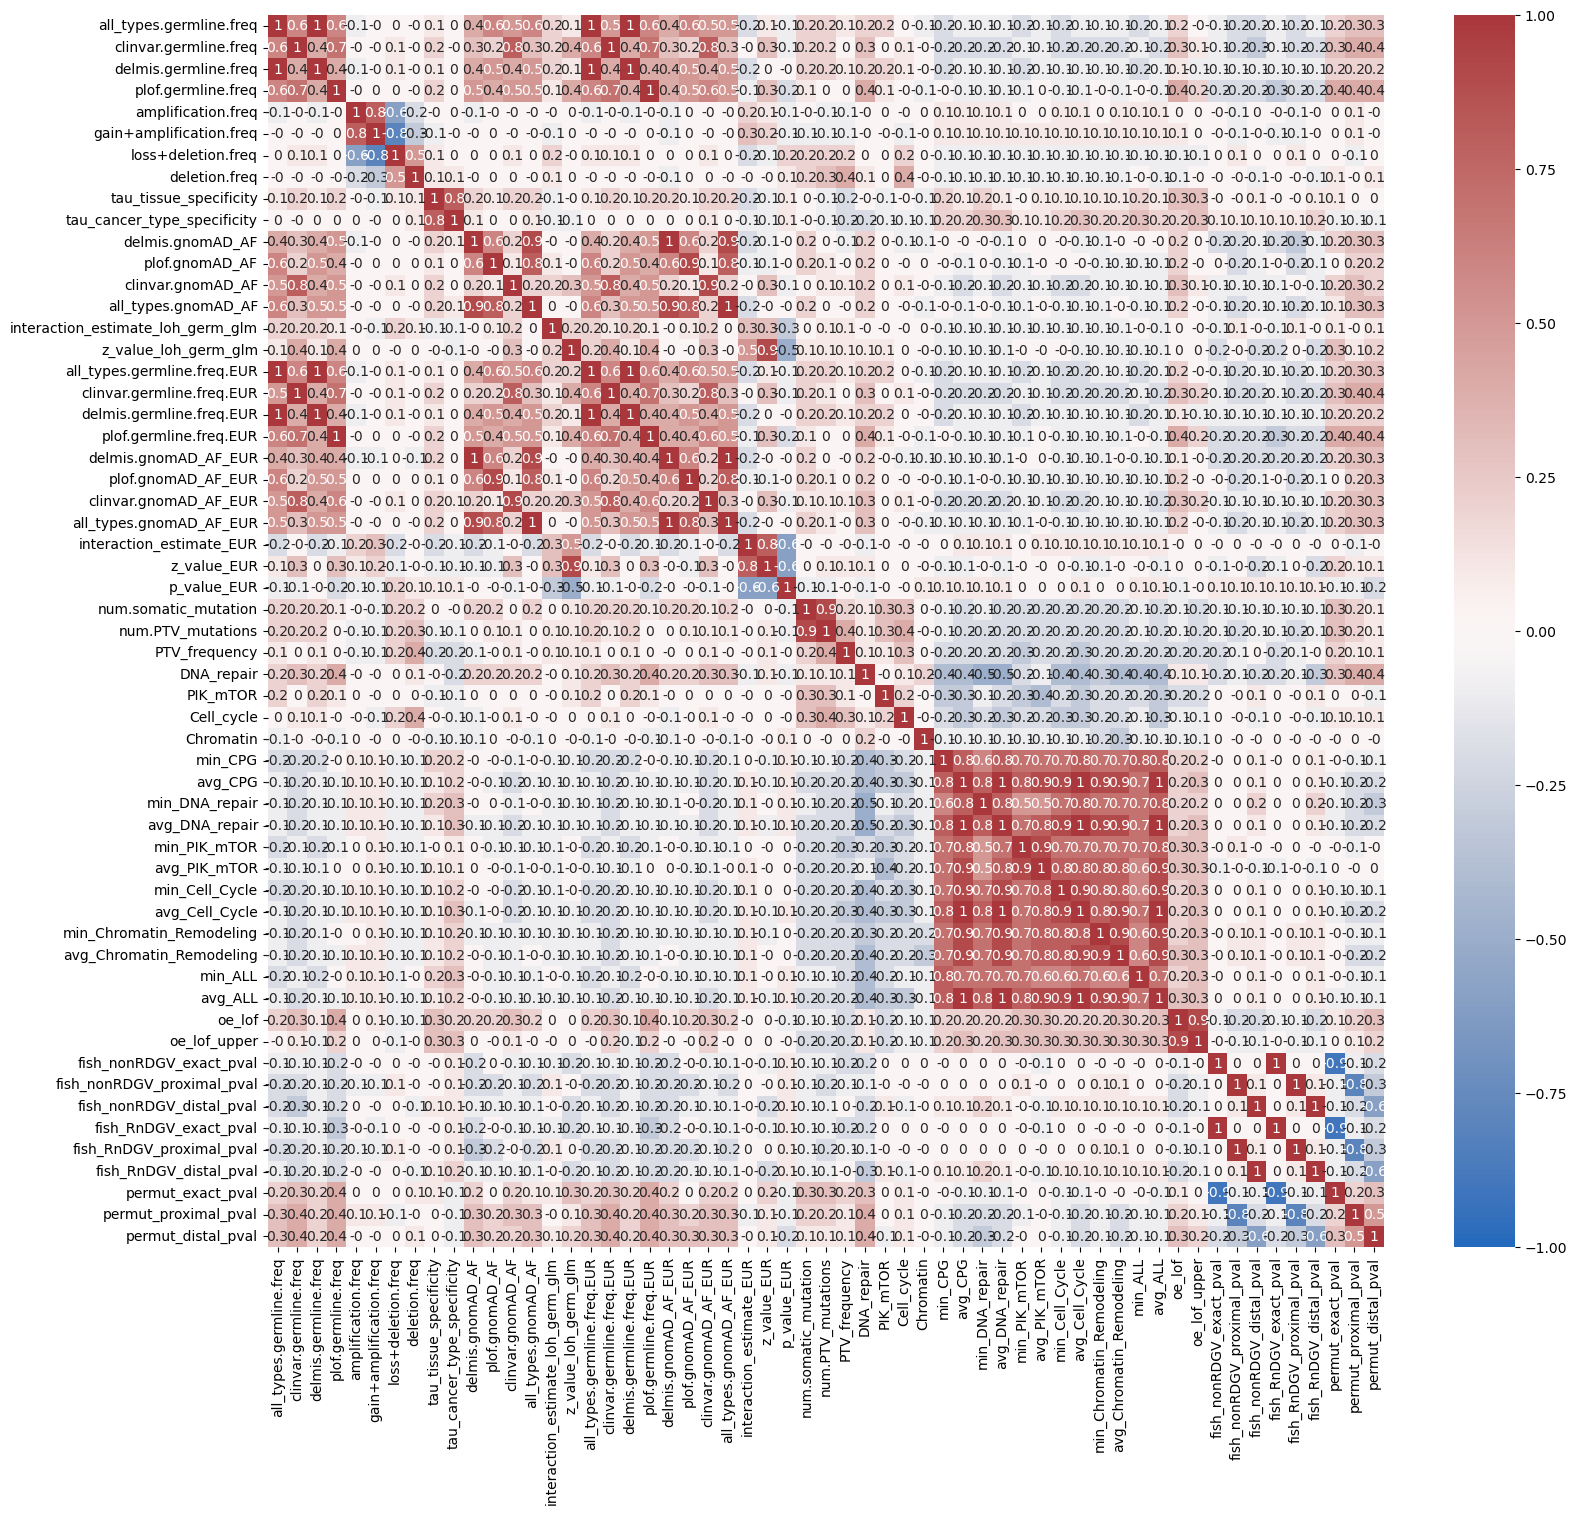

In [21]:
plt.figure(figsize=(18,16))
cor = X.corr().round(decimals = 1)
sns.heatmap(cor, annot=True, cmap="vlag", vmin = -1, vmax = 1)

plt.show()

In [22]:
X_reduced = X.drop(columns = #[s for s in X.columns if "gnomAD" in s] +
                             [s for s in X.columns if "min" in s] +
                             ["amplification.freq", "deletion.freq"] +
                             ["avg_CPG", "avg_DNA_repair", "avg_PIK_mTOR", "avg_Cell_Cycle", "avg_Chromatin_Remodeling"] +
                             ["DNA_repair", "PIK_mTOR", "Cell_cycle", "Chromatin"] +
                             ["tau_tissue_specificity", "num.PTV_mutations", "interaction_estimate_EUR", "z_value_EUR"] +
                             ["interaction_estimate_loh_germ_glm", "z_value_loh_germ_glm"] +
                             ["oe_lof_upper"] + [s for s in X.columns if "all_types" in s] +
                             ["clinvar.germline.freq", "delmis.germline.freq", "plof.germline.freq",
                              "clinvar.gnomAD_AF", "delmis.gnomAD_AF", "plof.gnomAD_AF"] +
                             [s for s in X.columns if "germline" in s] +
                             [s for s in X.columns if "fish" in s])
print(len(X_reduced.columns))
X_reduced.columns

14


Index(['gain+amplification.freq', 'loss+deletion.freq',
       'tau_cancer_type_specificity', 'delmis.gnomAD_AF_EUR',
       'plof.gnomAD_AF_EUR', 'clinvar.gnomAD_AF_EUR', 'p_value_EUR',
       'num.somatic_mutation', 'PTV_frequency', 'avg_ALL', 'oe_lof',
       'permut_exact_pval', 'permut_proximal_pval', 'permut_distal_pval'],
      dtype='object')

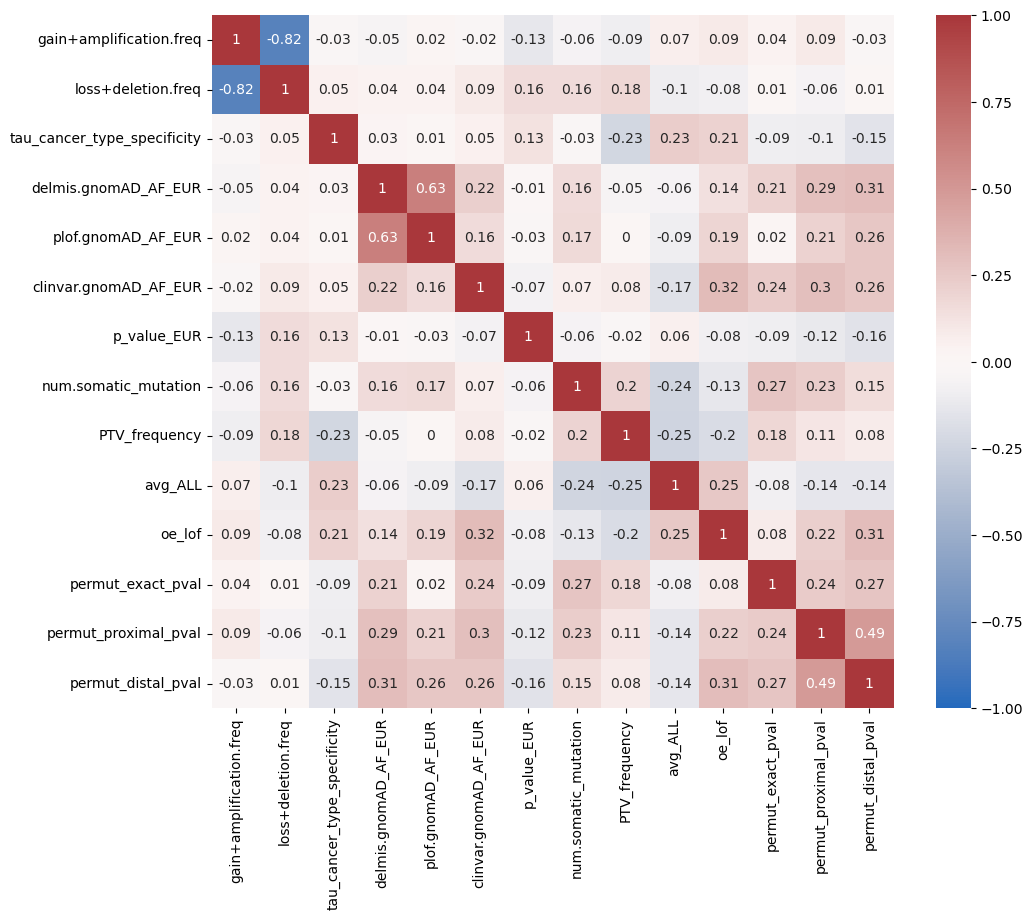

In [23]:
plt.figure(figsize=(11,9))
cor = X_reduced.corr().round(decimals = 2)
sns.heatmap(cor, annot=True, cmap="vlag", vmin = -1, vmax = 1)

plt.show()